In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("survey_results_public.csv")

In [3]:
df

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73264,73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73265,73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN
73266,73267,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training,NaN,NaN,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN


# 1: CLEANING THE DATA AND SPECIFYING THE VARIABLES TO BE     USED FOR THE PREDICTION OF SALARY

In [4]:
df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [5]:
df=df[['Country','EdLevel','YearsCodePro','Employment','ConvertedCompYearly']]
df=df.rename({'ConvertedCompYearly': 'Salary'},axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Employed, full-time",NaN


### dropping missing values

In [6]:
df=df[df['Salary'].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",60307.0
11,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,"Employed, full-time;Independent contractor, fr...",194400.0


# information about the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38071 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       38071 non-null  object 
 1   EdLevel       38054 non-null  object 
 2   YearsCodePro  37935 non-null  object 
 3   Employment    38067 non-null  object 
 4   Salary        38071 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.7+ MB


### dropping column where numbers are null (part of data cleaning techniques)

In [8]:
df=df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

# sorting - keeping data where user is full time employed

In [9]:
df=df[df["Employment"] == "Employed, full-time"]
df=df.drop("Employment",axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31382 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       31382 non-null  object 
 1   EdLevel       31382 non-null  object 
 2   YearsCodePro  31382 non-null  object 
 3   Salary        31382 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


### cleaning the country data

In [10]:
df["Country"].value_counts()

United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
                                                        ... 
Haiti                                                      1
Zambia                                                     1
Suriname                                                   1
Somalia                                                    1
Seychelles                                                 1
Name: Country, Length: 155, dtype: int64

### Eliminating countries with small number of developers

In [11]:
def shorten_categories(categories, cutoff):
    categorical_map={}
    for i in range(len(categories)):
        if categories.values[i]>=cutoff:
            categorical_map[categories.index[i]]=categories.index[i]
        else:
            categorical_map[categories.index[i]]='other'
    return categorical_map
        

In [12]:
country_map=shorten_categories(df.Country.value_counts(),400)
df['Country']=df['Country'].map(country_map)
df.Country.value_counts()

other                                                   8643
United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
France                                                  1126
Brazil                                                  1014
Spain                                                    858
Netherlands                                              701
Australia                                                700
Italy                                                    667
Poland                                                   572
Sweden                                                   561
Russian Federation                                       425
Switzerland                                              416
Name: Country, dtype: in

### inspecting the salary range by plotting 'salary against country'

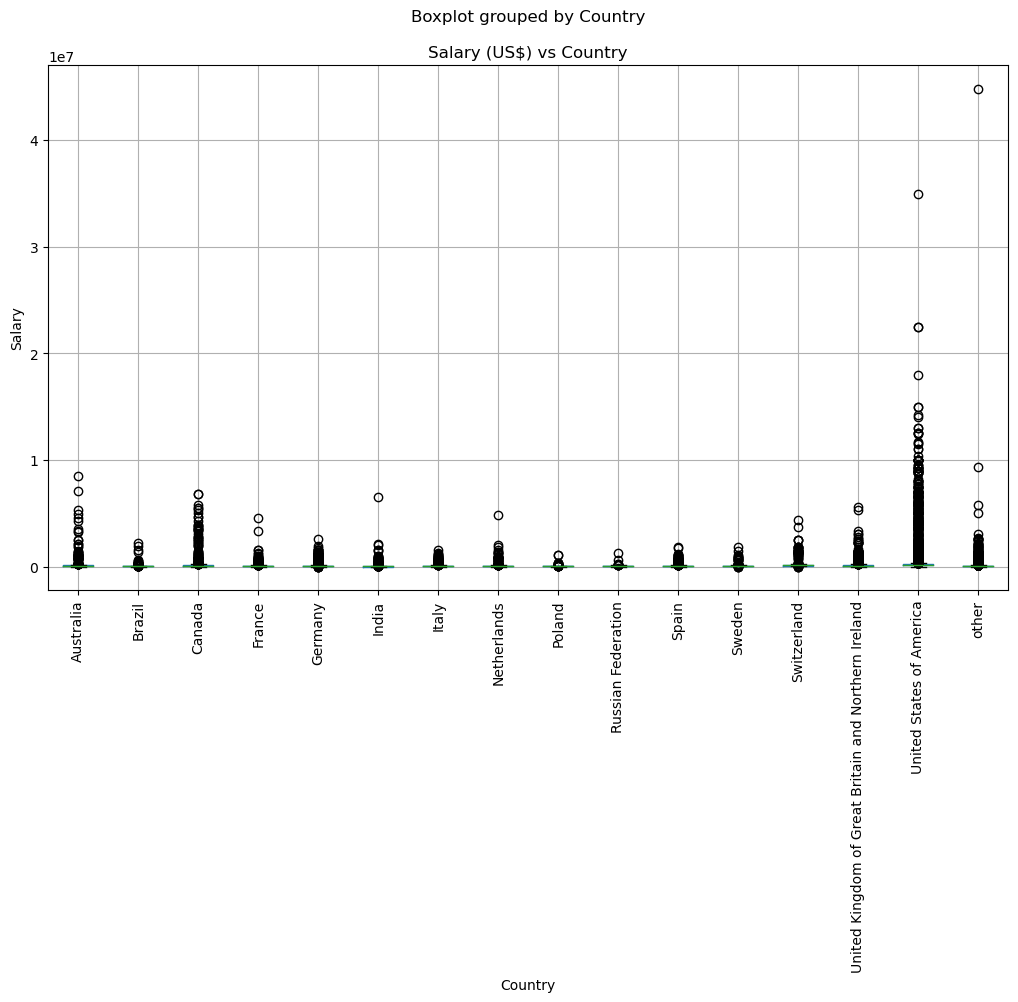

In [13]:
fig,ax=plt.subplots(1,1,figsize=(12,7))

df.boxplot('Salary','Country',ax=ax)
plt.title('Salary (US$) vs Country')
plt.ylabel("Salary")
plt.xticks(rotation=90)
plt.show()

### sorting salaries by providing conditions inorder to have the salary that are close to cut off (1) and to enable us interpret the boxplot easily after when we will have eliminated some of the many outliers appearing

In [14]:
df=df[df['Salary']<=250000]
df=df[df['Salary']>=10000]
df=df[df['Country'] !='other']

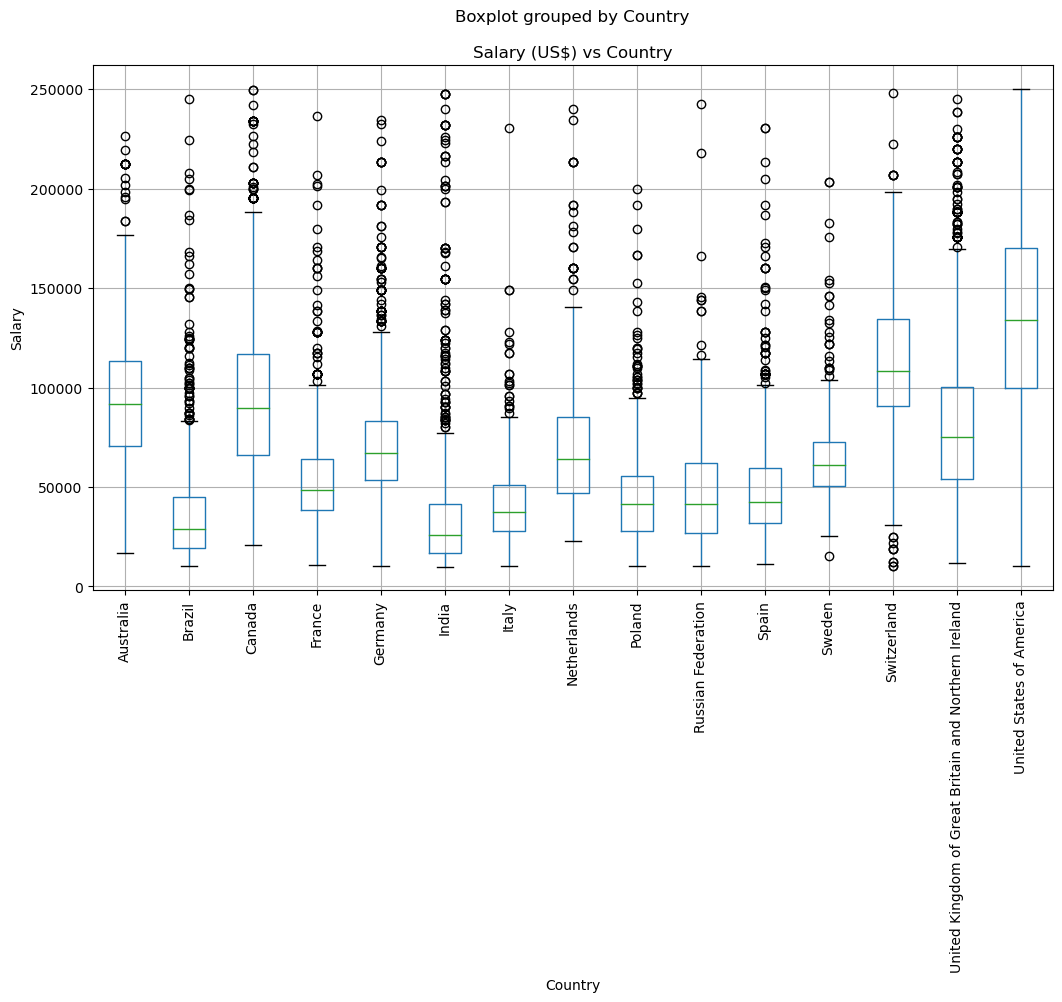

In [15]:
fig,ax=plt.subplots(1,1,figsize=(12,7))

df.boxplot('Salary','Country',ax=ax)
plt.title('Salary (US$) vs Country')
plt.ylabel("Salary")
plt.xticks(rotation=90)
plt.show()

## inspecting 'yearscodepro' variable and 'EdLevel' variable - unique values

In [16]:
df['YearsCodePro'].unique()

array(['5', '6', '2', '4', '20', '9', '14', '21', '15', '25', '3', '10',
       '8', '12', '7', '19', '17', '24', '1', '11', '23',
       'Less than 1 year', '18', '37', '46', '22', '32', '13', '27', '28',
       '16', '31', '34', '35', '26', '42', '38', '30', '36', '40', '41',
       '29', '33', '39', '48', '45', '44', '43', 'More than 50 years',
       '47', '49', '50'], dtype=object)

In [17]:
df['EdLevel'].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Something else',
       'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

### converting the values from string into float - 'YearsCodePro'

In [18]:
def clean_experience(x):
    if x== 'More than 50 years':
        return 50
    if x== 'Less than 1 year':
        return 0.5
    
    return float(x)
df['YearsCodePro']=df['YearsCodePro'].apply(clean_experience)

In [19]:
df['YearsCodePro'].unique()

array([ 5. ,  6. ,  2. ,  4. , 20. ,  9. , 14. , 21. , 15. , 25. ,  3. ,
       10. ,  8. , 12. ,  7. , 19. , 17. , 24. ,  1. , 11. , 23. ,  0.5,
       18. , 37. , 46. , 22. , 32. , 13. , 27. , 28. , 16. , 31. , 34. ,
       35. , 26. , 42. , 38. , 30. , 36. , 40. , 41. , 29. , 33. , 39. ,
       48. , 45. , 44. , 43. , 50. , 47. , 49. ])

### combining specified categories into one category - 'EdLevel'

In [20]:
def clean_education(x):
    if "Bachelor's degree" in x:
        return "Bachelor's degree"
    if "Master’s degree" in x:
        return "Master’s degree"
    if 'Professional degree' in x or 'Other doctoral degree' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel']=df['EdLevel'].apply(clean_education)

In [21]:
df['EdLevel'].unique()

array(['Master’s degree', 'Less than a Bachelors', 'Post grad'],
      dtype=object)

### converting categorical strings of 'EdLevel' into numerical values

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le_education=LabelEncoder()
df['EdLevel']=le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([1, 0, 2])

### doing the same to the 'Country'

In [24]:
le_country=LabelEncoder()
df['Country']=le_country.fit_transform(df['Country'])
df['Country'].unique()

array([13,  7, 14,  6,  2,  4,  8,  3,  1, 11, 10,  5, 12,  0,  9])

# 2. TRAINING THE MODEL

## Splitting data into x and y

In [25]:
x=df.drop('Salary',axis=1) # that is x will be the rest of the variables except salary
y=df['Salary']

## prediction with linear regression model

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
linear_reg=LinearRegression()
linear_reg.fit(x,y.values) #this is the model

LinearRegression()

In [28]:
y_predicted=linear_reg.predict(x)
y_predicted

array([102119.46366683,  74214.76809283,  95913.60431518, ...,
        98996.8640188 ,  81020.74279295,  98357.40872593])

### checking how fit is the model to predict (evaluating Mean squared error and later obtaining the error term)

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [30]:
MSE=mean_squared_error(y,y_predicted)
MSE

1998506756.8557606

In [31]:
error=np.sqrt(MSE)
print('${:,.02f}'.format(error))

$44,704.66


## since the above model has got higher value of both MSE and error, then try DecisionTreeRegressor model for estimation of the values and prediction of y

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
dec_tree_reg=DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(x,y.values) #this is the model

DecisionTreeRegressor(random_state=0)

In [34]:
y_pred=dec_tree_reg.predict(x)
y_pred

array([83773.04761905, 64753.5       , 49226.66666667, ...,
       92585.59183673, 37051.61538462, 64863.94736842])

In [35]:
MSE2=mean_squared_error(y,y_pred)
MSE2

1152129293.4224205

In [36]:
error2=np.sqrt(MSE2)
print('${:,.02f}'.format(error2))

$33,943.03


## By using RandomForestRegressor to predict (it converts decision tree above into multiple forests)

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
random_forest_reg=RandomForestRegressor(random_state=0)
random_forest_reg.fit(x,y.values) # this is the model

RandomForestRegressor(random_state=0)

In [39]:
y_pred2=random_forest_reg.predict(x)
y_pred2

array([84117.81110253, 65076.77008006, 48876.17935871, ...,
       92359.90677888, 36442.98093415, 64533.96511782])

In [40]:
MSE3=mean_squared_error(y,y_pred2)
MSE3

1156836285.3933911

In [41]:
error3=np.sqrt(MSE3)
print('${:,.02f}'.format(error3))

$34,012.30


## inorder to select the best model with the best parameters, we use GridSearch with CrossValidation since the above models result to large MSEs

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
max_depth=[None,2,4,5,8,10,12] #we can try the numbers when coming with best parameters
parameters={"max_depth":max_depth}

regressor=DecisionTreeRegressor(random_state=0)
grid_search= GridSearchCV(regressor,parameters,scoring='neg_mean_squared_error') #negated_mean_squared_error is used for regression problem in GridSearchCV
grid_search.fit(x,y.values) # this is the model

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 5, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [44]:
regressor=grid_search.best_estimator_

regressor.fit(x,y.values)
y_pred=regressor.predict(x)
y_pred

array([84141.62264151, 65306.64705882, 49226.66666667, ...,
       92585.59183673, 37929.75384615, 64984.95454545])

In [45]:
MSE_of_gs=mean_squared_error(y,y_pred)
MSE_of_gs

1221309702.7281108

In [46]:
error_of_gs=np.sqrt(MSE_of_gs)
print('${:,.02f}'.format(error_of_gs))

$34,947.24


## By using new data in predicting the salary in an array form

In [47]:
#the independent variables data
x 

,Country,EdLevel,YearsCodePro
2,13,1,5.0
8,7,1,6.0
10,13,0,2.0
12,14,0,5.0
21,6,1,4.0
...,...,...,...
73113,14,1,5.0
73116,14,0,16.0
73119,14,0,1.0
73120,10,0,2.0


### creating an array of specific attributes of the specified variables (country,edlevel,yearcodepro) and later letting the array to be x.values when building a model

In [48]:
x=np.array([["United States of America",'Master’s degree',15]])
x

array([['United States of America', 'Master’s degree', '15']],
      dtype='<U24')

### converting the strings into float in the array

In [49]:
x[:,0]=le_country.transform(x[:,0])
x[:,1]=le_education.transform(x[:,1])
x=x.astype(float)
x

array([[14.,  1., 15.]])

In [50]:
y_pred=regressor.predict(x) #the predicted salary
y_pred

C:\Users\Boss\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([162044.17808219])

## saving the model

In [51]:
import pickle

##### saving the data

In [52]:
data={'model':regressor,'le_country':le_country,'le_education':le_education} #this is the dictionary
with open('saved_steps.pkl','wb') as file: #this is the pickle file
    pickle.dump(data,file)

##### saving key for the data

In [53]:
with open('saved_steps.pkl','rb') as file:
    data=pickle.load(file)
    
regressor_loaded=data['model']
le_country=data['le_country']
le_education=data['le_education']

##### saving the prediction model

In [54]:
y_pred=regressor_loaded.predict(x)
y_pred

C:\Users\Boss\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([162044.17808219])